In [15]:
import pandas as pd

data = pd.read_csv('iris_data.csv', names=['sepal len', 'sepal wid', 'petal len', 'petal wid', 'target'])
data.head()

sepal len  sepal wid  petal len  petal wid       target
0        5.1        3.5        1.4        0.2  Iris-setosa
1        4.9        3.0        1.4        0.2  Iris-setosa
2        4.7        3.2        1.3        0.2  Iris-setosa
3        4.6        3.1        1.5        0.2  Iris-setosa
4        5.0        3.6        1.4        0.2  Iris-setosa

In [16]:
from sklearn.preprocessing import StandardScaler

features = ['sepal len', 'sepal wid', 'petal len', 'petal wid']

x = data.loc[:, features].values

y = data.loc[:, ['target']].values


x_scaled = StandardScaler().fit_transform(x)

x_scaled


array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [17]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)

principal_components = pca.fit_transform(x_scaled)

principal_data = pd.DataFrame(data=principal_components, columns=['pc1', 'pc2'])

principal_data.head()

pc1       pc2
0 -2.264542  0.505704
1 -2.086426 -0.655405
2 -2.367950 -0.318477
3 -2.304197 -0.575368
4 -2.388777  0.674767

In [18]:
final_data = pd.concat([principal_data, data['target']], axis=1)

final_data.head()

pc1       pc2       target
0 -2.264542  0.505704  Iris-setosa
1 -2.086426 -0.655405  Iris-setosa
2 -2.367950 -0.318477  Iris-setosa
3 -2.304197 -0.575368  Iris-setosa
4 -2.388777  0.674767  Iris-setosa

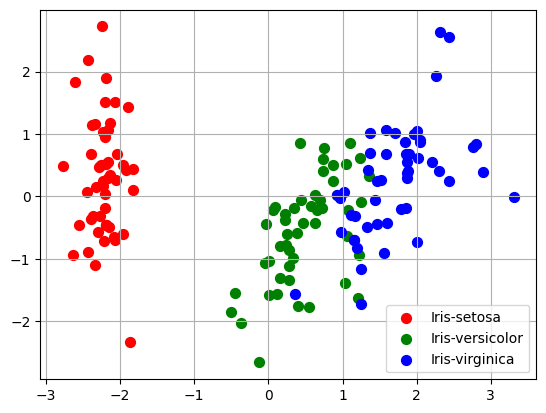

In [19]:

import matplotlib.pyplot as plt 
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indices_to_keep = final_data['target'] == target
    plt.scatter(final_data.loc[indices_to_keep, 'pc1'], final_data.loc[indices_to_keep, 'pc2'], c = color, s = 50)
plt.legend(targets)
plt.grid()
plt.show()
